In [9]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from kernels_class import *
from scipy import stats
from scipy.stats import norm

# check variance

In [10]:
def generate_sample_fig1(scale):
    n_source_plus = int(200*scale)
    n_source_minus = int(150*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    n_target_plus = int(25*scale)
    n_target_minus = int(75*scale)
    n_target = n_target_plus + n_target_minus
    pi_target = n_target_plus/n_target

    p_source_plus = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2), size=(n_source_plus))
    p_source_minus = np.random.multivariate_normal(mean=np.array([2,1]), cov=np.array([[2,1], [1,2]]), size=(n_source_minus))

    p_target_plus = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2), size=(n_target_plus))
    p_target_minus = np.random.multivariate_normal(mean=np.array([2,1]), cov=np.array([[2,1], [1,2]]), size=(n_target_minus))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

In [11]:
def generate_sample_fig2(scale):
    n_source_plus = int(150*scale)
    n_source_minus = int(200*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    n_target_plus = int(100*scale)
    n_target_minus = int(150*scale)
    n_target = n_target_plus + n_target_minus
    pi_target = n_target_plus/n_target

    p_source_plus = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2), size=(n_source_plus))
    p_source_minus = np.random.multivariate_normal(mean=np.array([2,1]), cov=np.array([[2,1], [1,2]]), size=(n_source_minus))

    p_target_plus = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.eye(2), size=(n_target_plus))
    p_target_minus = np.random.multivariate_normal(mean=np.array([2,1]), cov=np.array([[2,1], [1,2]]), size=(n_target_minus))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

In [12]:
def generate_sample_fig3(scale):
    n_source_plus = int(500*scale)
    n_source_minus = int(400*scale)
    n_source = n_source_plus + n_source_minus
    pi_source = n_source_plus/n_source

    n_target_plus = int(300*0.4*scale)
    n_target_minus = int(300*0.6*scale)
    n_target = n_target_plus + n_target_minus
    pi_target = n_target_plus/n_target

    p_source_plus = np.random.multivariate_normal(mean=np.array([0,0,0]), cov=np.eye(3), size=(n_source_plus))
    p_source_minus = np.random.multivariate_normal(mean=np.array([2,1,-1]), cov=np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), size=(n_source_minus))

    p_target_plus = np.random.multivariate_normal(mean=np.array([0,0,0]), cov=np.eye(3), size=(n_target_plus))
    p_target_minus = np.random.multivariate_normal(mean=np.array([2,1,-1]), cov=np.array([[1,0.5,0],[0.5, 1, 0.5],[0,0.5,1]]), size=(n_target_minus))

    p_target = np.vstack((p_target_plus, p_target_minus))

    return p_source_plus, p_source_minus, p_target

In [66]:
def plot_fig_2(res, res_var, denominator, pi_target):
    fig, axes = plt.subplots(2, 2, figsize=(6, 5))

    res_std = (res - pi_target) / (np.sqrt(res_var) * denominator)

    # Plot 1: Boxplot of res + horizontal line
    axes[0, 0].boxplot(res)
    axes[0, 0].plot([0.5, 1.5], [0.4, 0.4], 'r--')
    axes[0, 0].set_title("Boxplot of res")

    # Plot 2: Boxplot of scaled sqrt variance
    axes[0, 1].boxplot(np.sqrt(res_var) * denominator)
    axes[0, 1].set_title("Boxplot of std err")

    # Plot 3: Q-Q plot
    osm, osr = stats.probplot(res_std, dist="norm", plot=axes[1, 0])
    # osm, osr = stats.probplot(res_std, dist="norm", plot=axes[1, 0])
    axes[1, 0].plot(osm, osm, 'black', label=r'$y = x$ (Standard Normal)')
    axes[1, 0].set_title("Q-Q Plot of Normalized Residuals")
    # axes[1, 0].axis('equal') 

    # Plot 4: Histogram + normal PDF
    axes[1, 1].hist(res_std,density=True, alpha=0.6, label='Histogram')
    x_seq = np.linspace(-2, 2, 100)
    axes[1, 1].plot(x_seq, norm.pdf(x_seq), 'red', label='Standard Normal PDF')
    axes[1, 1].set_title("Histogram with Normal PDF")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Figure 1

## nrm/irp estimator

In [14]:
N = 100

In [40]:
res_nmr = np.zeros(N)
res_ipr = np.zeros(N)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig1(1)
    est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 2})
    est_tmp.estimate_pi_nrm()
    est_tmp.estimate_pi_ipr()

    res_nmr[i] = est_tmp.pi_nrm
    res_ipr[i] = est_tmp.pi_ipr

100%|██████████| 200/200 [00:00<00:00, 441.45it/s]


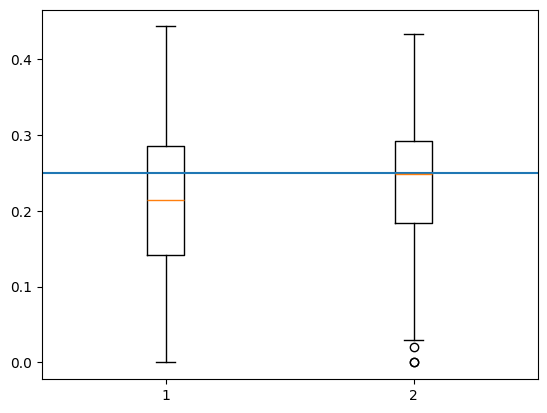

In [41]:
plt.boxplot([res_nmr, res_ipr])
plt.plot([0.5,2.5], [0.25, 0.25])
plt.show()

# Figure 2

In [42]:
N = 200

In [43]:
res_nmr = np.zeros(N)
res_nmr_var = np.zeros(N)
# res_nmr_var2 = np.zeros(N)
res_ipr = np.zeros(N)
res_ipr_var = np.zeros(N)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig2(1)
    est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 2})
    est_tmp.estimate_pi_nrm()
    est_tmp.estimate_pi_ipr()

    res_nmr[i] = est_tmp.pi_nrm
    res_ipr[i] = est_tmp.pi_ipr

    est_tmp.compute_sigmas2_nrm_1()
    est_tmp.compute_variance_nrm_1()
    res_nmr_var[i] = est_tmp.var_nrm_1

    est_tmp.compute_taus2_ipr_1()
    est_tmp.compute_variance_ipr_1()
    res_ipr_var[i] = est_tmp.var_ipr_1

    # est_tmp.compute_K2()
    # est_tmp.compute_sigmas2_nrm_2()
    # est_tmp.compute_variance_nrm_2()
    # res_nmr_var2[i] = est_tmp.var_nrm_2

100%|██████████| 200/200 [00:00<00:00, 288.85it/s]


In [44]:
n_source_plus = 150
n_source_minus = 200

n_target = 250

pi_target = 0.4

denominator = np.sqrt(1/n_source_plus + 1/n_source_minus + 1/n_target)

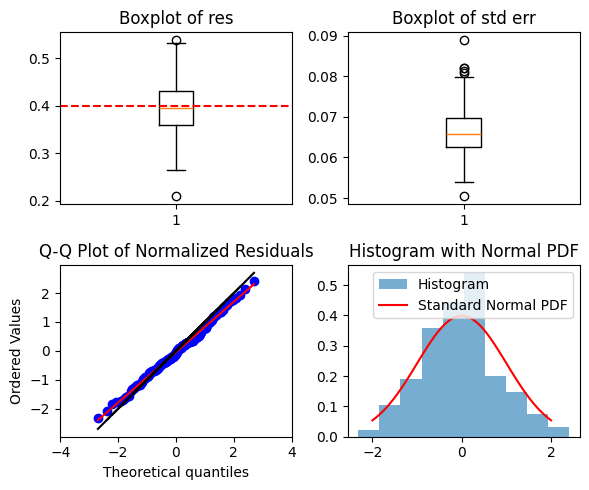

In [45]:
plot_fig_2(res_ipr, res_ipr_var, denominator, pi_target)

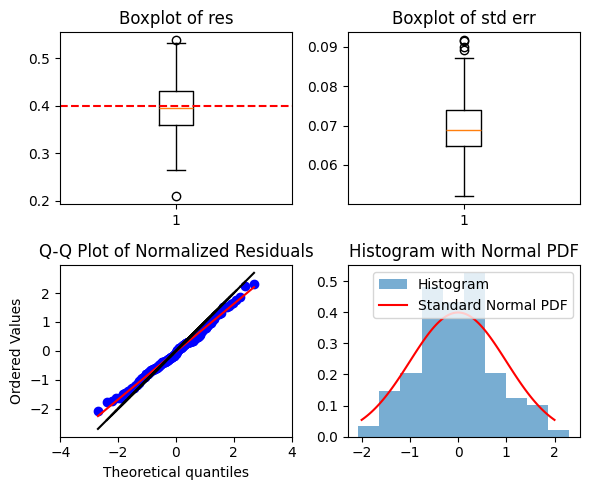

In [46]:
plot_fig_2(res_ipr, res_nmr_var, denominator, pi_target)

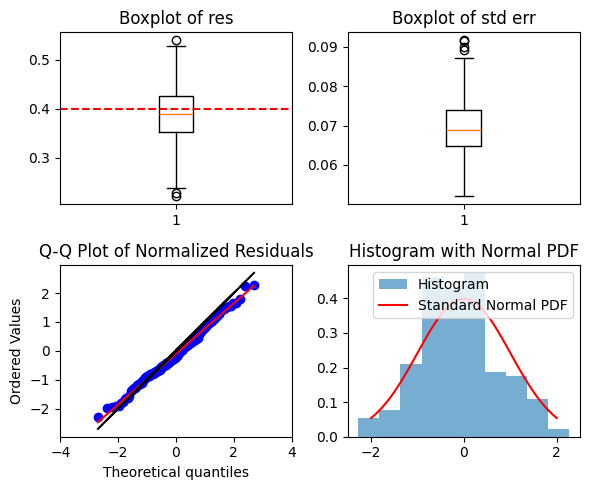

In [47]:
plot_fig_2(res_nmr, res_nmr_var, denominator, pi_target)

### Comparison of the two variances

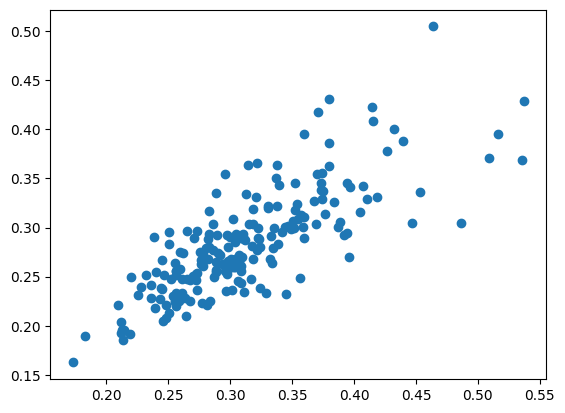

In [48]:
plt.plot(res_nmr_var, res_ipr_var, 'o')
plt.show()

### Scale the number of observations up

In [49]:
N = 100

res_nmr_20 = np.zeros(N)
res_nmr_var_20 = np.zeros(N)
res_ipr_20 = np.zeros(N)
res_ipr_var_20 = np.zeros(N)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig2(20)
    est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 2})
    est_tmp.estimate_pi_nrm()
    est_tmp.estimate_pi_ipr()

    res_nmr_20[i] = est_tmp.pi_nrm
    res_ipr_20[i] = est_tmp.pi_ipr

    est_tmp.compute_sigmas2_nrm_1()
    est_tmp.compute_variance_nrm_1()
    res_nmr_var_20[i] = est_tmp.var_nrm_1

    est_tmp.compute_taus2_ipr_1()
    est_tmp.compute_variance_ipr_1()
    res_ipr_var_20[i] = est_tmp.var_ipr_1


100%|██████████| 100/100 [03:29<00:00,  2.10s/it]


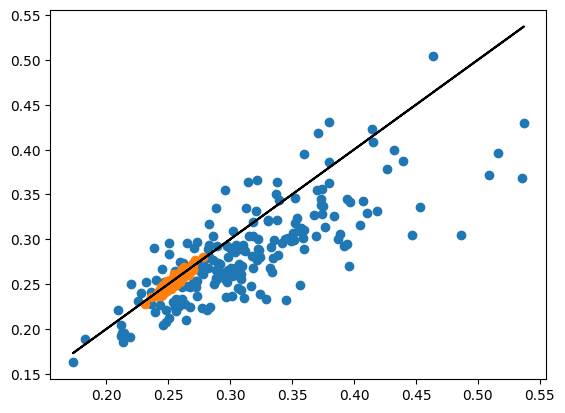

In [50]:
plt.plot(res_nmr_var, res_ipr_var, 'o')
plt.plot(res_nmr_var_20, res_ipr_var_20, 'o')
plt.plot(res_nmr_var, res_nmr_var, 'black')
plt.show()

In [51]:
est_tmp.sigma2_target_1/est_tmp.pi_nrm**2, est_tmp.sigma2_positive_1/est_tmp.pi_nrm**2, est_tmp.sigma2_negative_1/est_tmp.pi_nrm**2

(np.float64(0.005641144980737387),
 np.float64(0.0005074159540866247),
 np.float64(0.0013558054689638674))

In [52]:
est_tmp.tau2_target_1, est_tmp.tau2_positive_1, est_tmp.tau2_negative_1

(np.float64(0.005482893740999597),
 np.float64(0.0005831342274198861),
 np.float64(0.0014112616042440509))

In [53]:
est_tmp.lambda_target, est_tmp.lambda_source_positive, est_tmp.lambda_source_negative

(0.25531914893617025, 0.425531914893617, 0.3191489361702128)

In [54]:
np.mean(res_nmr_var),np.mean(res_nmr_var_20),np.mean(res_ipr_var),np.mean(res_ipr_var_20)

(np.float64(0.31270083355508943),
 np.float64(0.2539779679316058),
 np.float64(0.2840285135859151),
 np.float64(0.2525538219894862))

In [55]:
n_source_plus = 150*20
n_source_minus = 200*20

n_target = 250*20

pi_target = 0.4

denominator = np.sqrt(1/n_source_plus + 1/n_source_minus + 1/n_target)

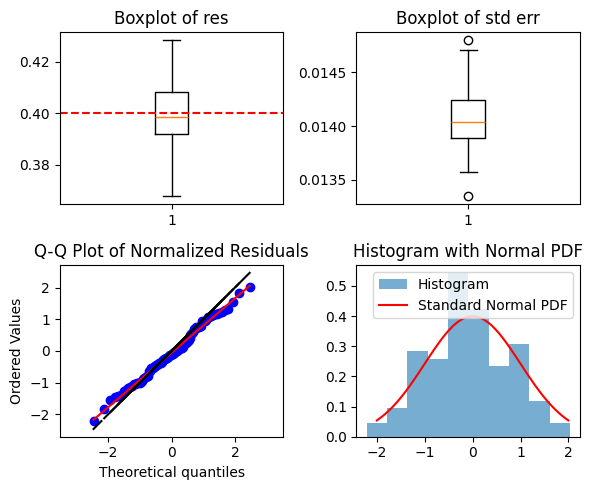

In [56]:
plot_fig_2(res_ipr_20, res_ipr_var_20, denominator, pi_target)

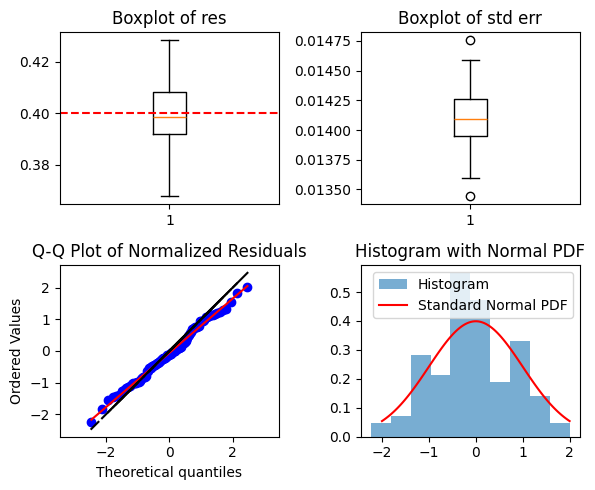

In [57]:
plot_fig_2(res_ipr_20, res_nmr_var_20, denominator, pi_target)

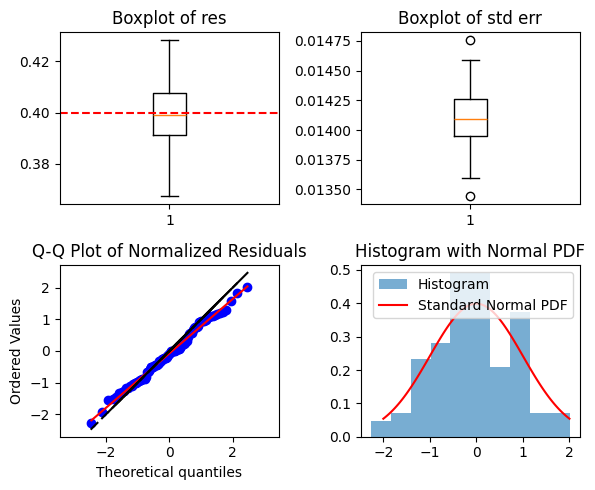

In [58]:
plot_fig_2(res_nmr_20, res_nmr_var_20, denominator, pi_target)

# Figure 3

In [59]:
N = 200

In [76]:
res_nmr = np.zeros(N)
res_nmr_var = np.zeros(N)
# res_nmr_var2 = np.zeros(N)
res_ipr = np.zeros(N)
res_ipr_var = np.zeros(N)

for i in tqdm(range(N)):

    p_source_plus, p_source_minus, p_target = generate_sample_fig3(1)
    est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 2})
    est_tmp.estimate_pi_nrm()
    est_tmp.estimate_pi_ipr()

    res_nmr[i] = est_tmp.pi_nrm
    res_ipr[i] = est_tmp.pi_ipr

    est_tmp.compute_sigmas2_nrm_1()
    est_tmp.compute_variance_nrm_1()
    res_nmr_var[i] = est_tmp.var_nrm_1

    est_tmp.compute_taus2_ipr_1()
    est_tmp.compute_variance_ipr_1()
    res_ipr_var[i] = est_tmp.var_ipr_1

    # est_tmp.compute_K2()
    # est_tmp.compute_sigmas2_nrm_2()
    # est_tmp.compute_variance_nrm_2()
    # res_nmr_var2[i] = est_tmp.var_nrm_2

100%|██████████| 200/200 [00:03<00:00, 56.22it/s]


In [77]:
n_source_plus = 500
n_source_minus = 400

n_target = 300

pi_target = 0.4

denominator = np.sqrt(1/n_source_plus + 1/n_source_minus + 1/n_target)

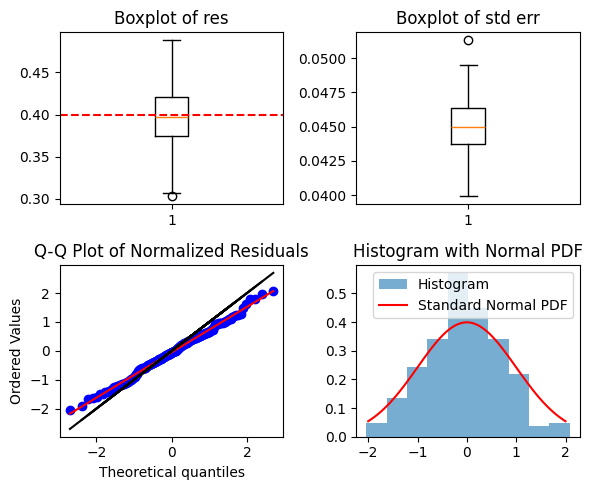

In [78]:
plot_fig_2(res_ipr, res_ipr_var, denominator, pi_target)

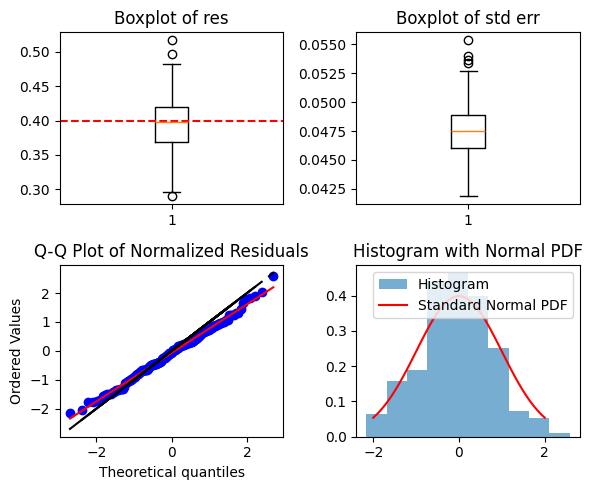

In [79]:
plot_fig_2(res_nmr, res_nmr_var, denominator, pi_target)

# Exact same data

In [4]:
np.random.seed(123)
p_source_plus, p_source_minus, p_target = generate_sample_fig1(1)

In [18]:
np.savetxt('Johan_code/p_source_plus.txt', p_source_plus)
np.savetxt('Johan_code/p_source_minus.txt', p_source_minus)
np.savetxt('Johan_code/p_target.txt', p_target)

In [5]:
est_tmp = estimator_RHKS(p_target, p_source_plus, p_source_minus, kernel_params={'gamma': 2})
est_tmp.estimate_pi_nrm()
est_tmp.estimate_pi_ipr()

est_tmp.compute_sigmas2_nrm_1()
est_tmp.compute_variance_nrm_1()

est_tmp.compute_taus2_ipr_1()
est_tmp.compute_variance_ipr_1()

In [6]:
est_tmp.pi_nrm, est_tmp.pi_ipr

(np.float64(0.24959599800552454), np.float64(0.18995544389977165))

In [7]:
np.sqrt(est_tmp.s_n*est_tmp.var_nrm_1), np.sqrt(est_tmp.s_n*est_tmp.var_ipr_1)

(np.float64(0.14497735568382847), np.float64(0.11029909573985716))

In [8]:
est_tmp.tau2_target_1, est_tmp.tau2_positive_1, est_tmp.tau2_negative_1

(np.float64(0.005089119331461076),
 np.float64(0.0006262849699597163),
 np.float64(0.002628511133399597))